# Ocean 215 Final Project

## 0. Background information

### Scientific questions:

What are the relations between ocean heat anomaly and other possible factors including global temperature anomaly, sea level, and CO2 volume?

How are they correlated (which increases faster)?

What are the trends in comparison?

### Hypothesis:

Global temperature anomaly, sea level, and CO2 volume should be tightly related with ocean heat anomaly (positive correlation).

## 1. Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

## 2. Data process and plot analysis

### 2.1 Ocean heat anomaly

Year  month  heat content anomaly (10^22  Joules)
0   1955      6                             -0.112888
1   1956      6                             -4.435912
2   1957      6                             -5.581200
3   1958      6                             -1.357916
4   1959      6                             -0.125907
..   ...    ...                                   ...
63  2018      6                             15.545946
64  2019      6                             17.515776
65  2020      6                             17.286221
66  2021      6                             17.946842
67  2022      6                             20.062943

[68 rows x 3 columns]

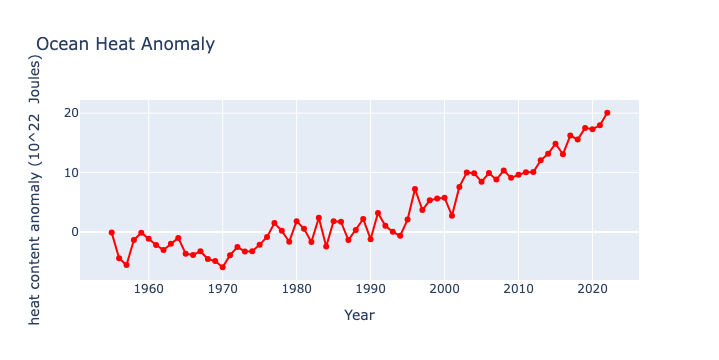

In [2]:
# Read ocean heat anomaly data from a CSV file and store it in a DataFrame
ocean_temp = pd.read_csv("data/ohc_levitus_climdash_seasonal.csv")

# Display the DataFrame for a quick view of the data structure and contents
display(ocean_temp)

# Plotting ocean heat anomaly data
fig = px.line(
    ocean_temp,  # DataFrame containing the data
    x='Year',  # Column in DataFrame to be used as the X-axis
    y='heat content anomaly (10^22  Joules)',  # Column for the Y-axis
    color_discrete_sequence=['red'],  # Set the color of the line in the plot
    markers=True,  # Include markers for individual data points
    title='Ocean Heat Anomaly'  # Title of the plot
)

# Display the plot
fig.show()

### Prior analysis: 

From the plot we can obviously find that the ocean heat content anomaly keeps increasing ever since 1970 and speeds up around year 1994 and 2001.

### 2.2 Global temperature anomaly

##### 2.2.1 Original data

In [3]:
# read global temperature data
glob_temp = pd.read_csv('data/Global Temperature.csv')
display(glob_temp)

Year   Month  Monthly Anomaly  Monthly Unc.   Annual Anomaly   
0     1850       1           -0.801         0.482              NaN  \
1     1850       2           -0.102         0.592              NaN   
2     1850       3           -0.119         0.819              NaN   
3     1850       4           -0.485         0.575              NaN   
4     1850       5           -0.351         0.549              NaN   
...    ...     ...              ...           ...              ...   
2072  2022       9            0.971           NaN              NaN   
2073  2022      10            1.126           NaN              NaN   
2074  2022      11            0.626           NaN              NaN   
2075  2022      12            0.923           NaN              NaN   
2076  2023       1            0.963           NaN              NaN   

      Annual Unc Five-Year Anomaly  Five-Year Unc.  Ten-Year Anomaly   
0            NaN               NaN             NaN               NaN  \
1            NaN               NaN             NaN               NaN   
2            NaN               NaN             NaN               NaN   
3            NaN               NaN             NaN               NaN   
4            NaN               NaN             NaN               NaN   
...          ...               ...             ...               ...   
2072         NaN               NaN             NaN               NaN   
2073         NaN               NaN             NaN               NaN   
2074         NaN               NaN             NaN               NaN   
2075         NaN               NaN             NaN               NaN   
2076         NaN               NaN             NaN               NaN   

      Ten-Year Unc.   Twenty-Year Anomaly  Twenty-year Unc.  
0               NaN                   NaN               NaN  
1               NaN                   NaN               NaN  
2               NaN                   NaN               NaN  
3               NaN                   NaN               NaN  
4               NaN                   NaN               NaN  
...             ...                   ...               ...  
2072            NaN                   NaN               NaN  
2073            NaN                   NaN               NaN  
2074            NaN                   NaN               NaN  
2075            NaN                   NaN               NaN  
2076            NaN                   NaN               NaN  

[2077 rows x 12 columns]

##### 2.2.2 Filter data (drop columns)

In [4]:
# List of column names that are to be removed from the DataFrame
columns_to_remove = [' Monthly Unc.', ' Annual Unc',  ' Five-Year Unc.',' Ten-Year Anomaly', ' Ten-Year Unc.',
                     '  Twenty-Year Anomaly', ' Twenty-year Unc.', '  Annual Anomaly', 'Five-Year Anomaly']
# Removing the specified columns from the DataFrame 'glob_temp' in place
glob_temp.drop(columns=columns_to_remove, inplace=True)
display(glob_temp)

Year   Month  Monthly Anomaly
0     1850       1           -0.801
1     1850       2           -0.102
2     1850       3           -0.119
3     1850       4           -0.485
4     1850       5           -0.351
...    ...     ...              ...
2072  2022       9            0.971
2073  2022      10            1.126
2074  2022      11            0.626
2075  2022      12            0.923
2076  2023       1            0.963

[2077 rows x 3 columns]

##### 2.2.3 Plot and analysis

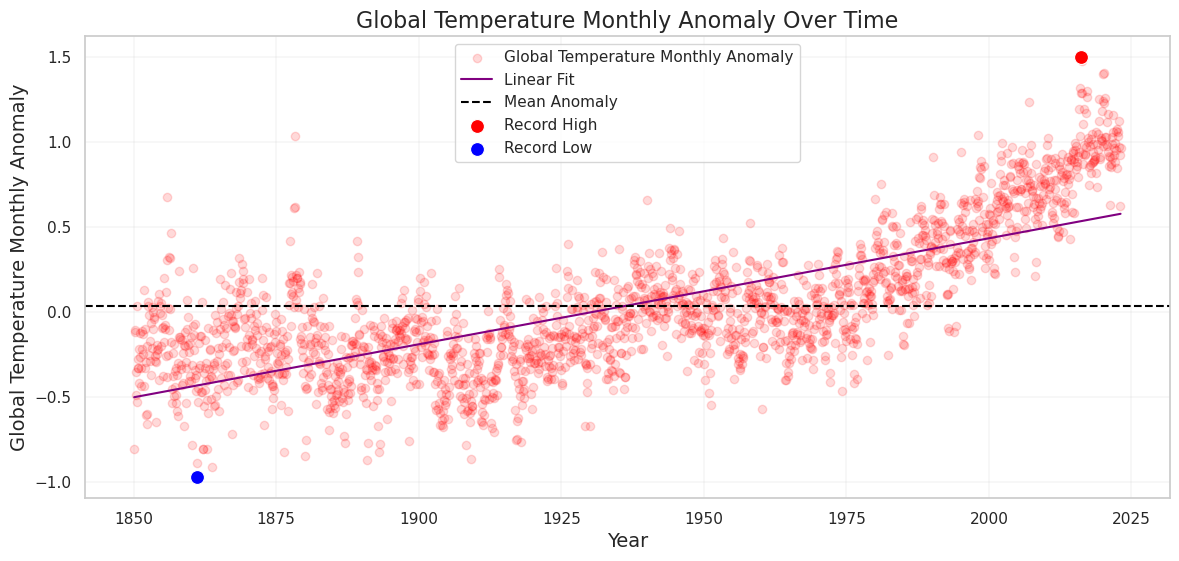

In [5]:
# plot global temperature monthly anomaly
# Setting the visual style of seaborn plots to 'whitegrid'
sns.set(style="whitegrid")

# Creating arrays for the x and y data. The x_data is a combination of 'Year' and 'Month' to form a continuous scale
x_data = np.asanyarray(glob_temp['Year'] + glob_temp[' Month'] / 12)

# Creating an array for the y_data which represents the 'Monthly Anomaly'
y_data = np.asanyarray(glob_temp['Monthly Anomaly'])

# Performing linear regression on the x and y data
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

# Calculating the y-values for the linear fit line
line = slope * x_data + intercept

# Creating a figure and axis object with matplotlib, setting the size of the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plotting the scatter plot of the monthly anomalies in red color with some transparency (alpha=0.2)
ax.scatter(x_data, y_data, c='red', alpha=0.15, label='Global Temperature Monthly Anomaly')

# Plotting the linear fit line in purple
ax.plot(x_data, line, color='purple', label='Linear Fit')

# Setting title and labels for the axes with specified font sizes
ax.set_title('Global Temperature Monthly Anomaly Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Global Temperature Monthly Anomaly', fontsize=14)

# Setting the grid line width
ax.grid(lw=0.2)

# Adding a legend at the lower right corner
ax.legend(fontsize=14, loc='lower right')

# Calculating the mean of the y_data and drawing a horizontal line at this mean value
mean_y = np.mean(y_data)
ax.axhline(mean_y, color='black', linestyle='--', label='Mean Anomaly')

# Updating the legend to include the mean line
ax.legend(fontsize=14, loc='lower right')

# Highlighting specific data points: the maximum and minimum monthly anomalies
highlight = [max(y_data), min(y_data)]

# Plotting the record high point in red
sns.scatterplot(x=x_data[y_data == highlight[0]], y=[highlight[0]], color='red', s=100, label='Record High', ax=ax)

# Plotting the record low point in blue
sns.scatterplot(x=x_data[y_data == highlight[1]], y=[highlight[1]], color='blue', s=100, label='Record Low', ax=ax)

# Displaying the plot
plt.show()

### Prior analysis:

We can see that before year around 1935, most global temperature anomaly keeps under 0 baseline but after that the anomaly becomes concentrated for positive value and sharply increases after year 1975.

### 2.3 Global sea level

year        date  mmfrom1993-2008average
0    1880  07/15/1880             -183.247396
1    1881  07/15/1881             -174.014062
2    1882  07/15/1882             -190.080729
3    1883  07/15/1883             -185.147396
4    1884  07/15/1884             -166.280729
..    ...         ...                     ...
136  2016   7/15/2016               54.346964
137  2017   7/15/2017               57.355991
138  2018   7/15/2018               53.085122
139  2019   7/15/2019               61.393713
140  2020   7/15/2020               66.704325

[141 rows x 3 columns]

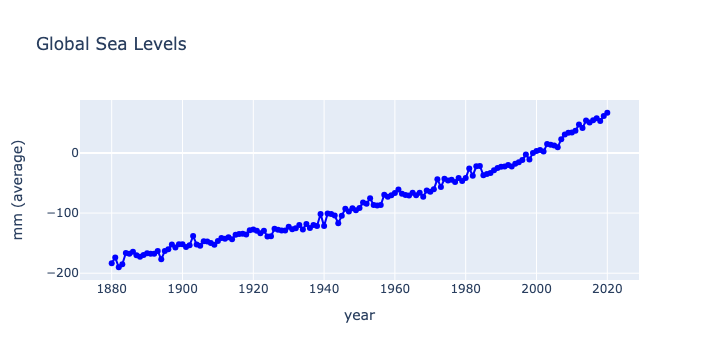

In [6]:
# Read sea level data from a CSV file and store it in a DataFrame named 'sea_level'
sea_level = pd.read_csv('data/Global_sea_level_rise.csv')

# Display the DataFrame 'sea_level' for a quick view of its data structure and contents
display(sea_level)

# Create a line plot using Plotly Express to visualize sea level data
fig = px.line(
    sea_level,  # DataFrame containing the data
    x='year',  # Column in the DataFrame to be used as the X-axis
    y='mmfrom1993-2008average',  # Column for the Y-axis, representing sea level changes
    color_discrete_sequence=['blue'],  # Set the color of the line in the plot to blue
    markers=True,  # Include markers for individual data points
    title='Global Sea Levels',  # Title of the plot
    labels={'mmfrom1993-2008average':'mm (average)'}  # Renaming the y-axis label for better readability
)

# Display the plot
fig.show()

### Prior analysis:

Sea level increases continuously as we expected but rises more rapidly since year around 1970.

### 2.4 CO2 ppm

year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0    1958      3     1958.2027   315.70          314.43     -1 -9.99 -0.99
1    1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2    1958      5     1958.3699   317.51          314.71     -1 -9.99 -0.99
3    1958      6     1958.4548   317.24          315.14     -1 -9.99 -0.99
4    1958      7     1958.5370   315.86          315.18     -1 -9.99 -0.99
..    ...    ...           ...      ...             ...    ...   ...   ...
773  2022      8     2022.6250   417.19          419.15     27  0.34  0.13
774  2022      9     2022.7083   415.95          419.48     28  0.41  0.15
775  2022     10     2022.7917   415.78          419.12     30  0.27  0.09
776  2022     11     2022.8750   417.51          419.53     25  0.52  0.20
777  2022     12     2022.9583   418.95          419.65     24  0.50  0.19

[778 rows x 8 columns]

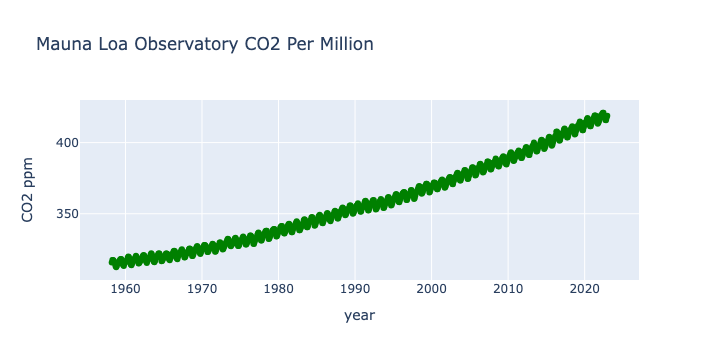

In [7]:
# Read CO2 data from a CSV file into a DataFrame named 'co2'
co2 = pd.read_csv("data/co2_mm_mlo.csv")

# Display the DataFrame 'co2' for a quick view of its data structure and contents
display(co2)

# Create a line plot for the CO2 trend using Plotly Express
fig = px.line(
    co2,  # DataFrame containing the CO2 data
    x='decimal date',  # Column in DataFrame to be used as the X-axis, representing dates in decimal format
    y='average',  # Column for the Y-axis, representing the average CO2 concentration
    color_discrete_sequence=['green'],  # Set the color of the line in the plot to purple
    markers=True,  # Include markers for individual data points
    hover_data=['year','month','average'],  # Data to show when hovering over a point
    title='Mauna Loa Observatory CO2 Per Million',  # Title of the plot
    labels={'decimal date':'year', 'average':'CO2 ppm'}  # Renaming axis labels for clarity
)

# Display the plot
fig.show()

### Prior analysis:

CO2 volume is quite similar with sea level, since they keep increasing continuously all the time because of global warming.

## 3. Merged plot and analysis

### 3.1 Global Temperature Monthly Anomaly and Ocean Heat Anomaly

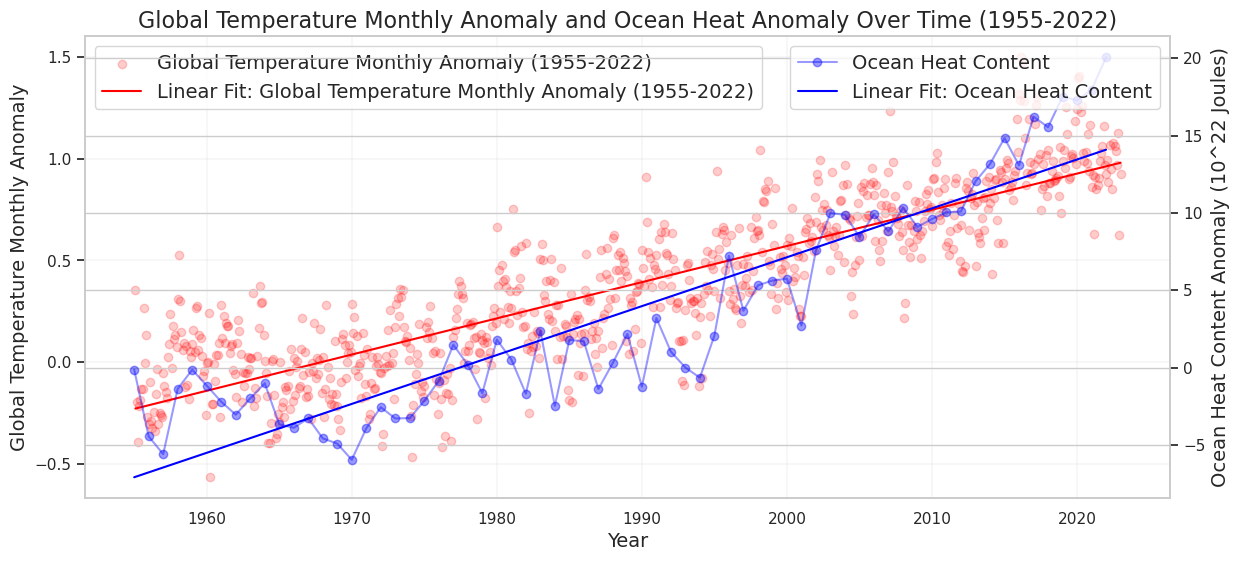

In [8]:
# Filter the Global Temperature data to include only the years 1955 to 2022
filtered_glob_temp = glob_temp[(glob_temp['Year'] >= 1955) & (glob_temp['Year'] <= 2022)]

# Combine 'Year' and 'Month' columns into a single continuous value for the filtered data
x_data_filtered = np.asanyarray(filtered_glob_temp['Year'] + filtered_glob_temp[' Month'] / 12)
y_data_filtered = np.asanyarray(filtered_glob_temp['Monthly Anomaly'])

# Perform linear regression on the filtered Global Temperature data
slope_filtered, intercept_filtered, _, _, _ = stats.linregress(x_data_filtered, y_data_filtered)
line_filtered = slope_filtered * x_data_filtered + intercept_filtered

# Perform linear regression on the Ocean Heat data
x_data_ocean = np.asanyarray(ocean_temp['Year'])
y_data_ocean = np.asanyarray(ocean_temp['heat content anomaly (10^22  Joules)'])
slope_ocean, intercept_ocean, _, _, _ = stats.linregress(x_data_ocean, y_data_ocean)
line_ocean = slope_ocean * x_data_ocean + intercept_ocean

# Create a figure and axis for plotting with matplotlib
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the filtered Global Temperature data with a scatter plot and a linear fit line
ax1.scatter(x_data_filtered, y_data_filtered, color='red', alpha=0.2, label='Global Temperature Monthly Anomaly (1955-2022)')
ax1.plot(x_data_filtered, line_filtered, color='red', label='Linear Fit: Global Temperature Monthly Anomaly (1955-2022)')

# Set title, labels, grid, and legend for the first axis
ax1.set_title('Global Temperature Monthly Anomaly and Ocean Heat Anomaly Over Time (1955-2022)', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Global Temperature Monthly Anomaly', fontsize=14)
ax1.grid(lw=0.2)
ax1.legend(fontsize=14, loc='upper left')

# Create a second axis for plotting Ocean Heat Content Anomaly
ax2 = ax1.twinx()
ax2.plot(x_data_ocean, y_data_ocean, alpha=0.4, color='blue', label='Ocean Heat Content', marker='o')
ax2.plot(x_data_ocean, line_ocean, color='blue', label='Linear Fit: Ocean Heat Content')

# Set labels and legend for the second axis
ax2.set_ylabel('Ocean Heat Content Anomaly (10^22 Joules)', fontsize=14)
ax2.legend(fontsize=14, loc='upper right')

# Display the combined plot
plt.show()

### Plot analysis:

Both slopes are positive and the have the same sign, which means they have positive correlation. They intercept around year 2008, and after then, ocean heat anomaly increases faster than global temperature anomaly.

### 3.2 Ocean Heat Anomaly and Sea Level

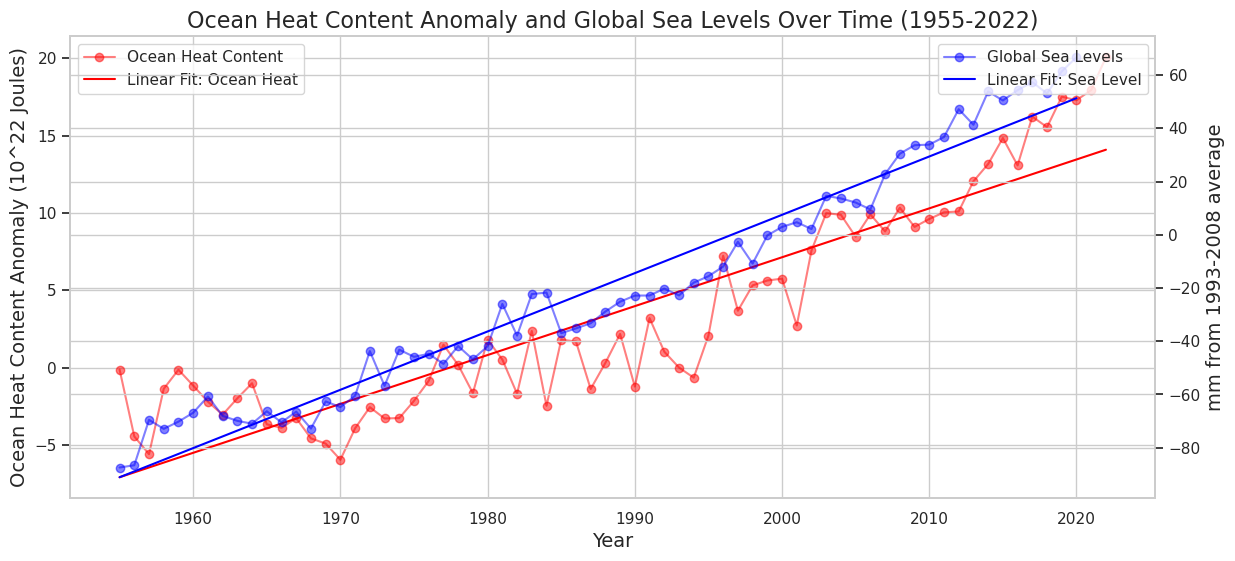

In [9]:
# Filter the Ocean Heat Anomaly data to include only the years 1955 to 2022
filtered_ocean_temp = ocean_temp[(ocean_temp['Year'] >= 1955) & (ocean_temp['Year'] <= 2022)]
x_data_ocean = np.asanyarray(filtered_ocean_temp['Year'])  # Extract the 'Year' column as array for X-axis data
y_data_ocean = np.asanyarray(filtered_ocean_temp['heat content anomaly (10^22  Joules)'])  # Extract the 'heat content anomaly' column as array for Y-axis data

# Perform linear regression on the filtered Ocean Heat data
slope_ocean, intercept_ocean, _, _, _ = stats.linregress(x_data_ocean, y_data_ocean)
line_ocean = slope_ocean * x_data_ocean + intercept_ocean  # Calculate the regression line

# Filter the Sea Level data to include only the years 1955 to 2022
filtered_sea_level = sea_level[(sea_level['year'] >= 1955) & (sea_level['year'] <= 2022)]
x_data_sea = np.asanyarray(filtered_sea_level['year'])  # Extract the 'year' column as array for X-axis data
y_data_sea = np.asanyarray(filtered_sea_level['mmfrom1993-2008average'])  # Extract the 'mmfrom1993-2008average' column as array for Y-axis data

# Perform linear regression on the filtered Sea Level data
slope_sea, intercept_sea, _, _, _ = stats.linregress(x_data_sea, y_data_sea)
line_sea = slope_sea * x_data_sea + intercept_sea  # Calculate the regression line

# Create the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the Ocean Heat Anomaly data
ax1.plot(x_data_ocean, y_data_ocean, color='red', alpha=0.5, label='Ocean Heat Content', marker='o')  # Scatter plot for Ocean Heat
ax1.plot(x_data_ocean, line_ocean, color='red', label='Linear Fit: Ocean Heat')  # Regression line for Ocean Heat
ax1.set_xlabel('Year', fontsize=14)  # X-axis label
ax1.set_ylabel('Ocean Heat Content Anomaly (10^22 Joules)', fontsize=14)  # Y-axis label for Ocean Heat
ax1.legend(loc='upper left')  # Legend for the first plot

# Create a second axis for plotting the Sea Level data
ax2 = ax1.twinx()

# Plot the Sea Level data
ax2.plot(x_data_sea, y_data_sea, color='blue', alpha=0.5, label='Global Sea Levels', marker='o')  # Scatter plot for Sea Level
ax2.plot(x_data_sea, line_sea, color='blue', label='Linear Fit: Sea Level')  # Regression line for Sea Level
ax2.set_ylabel('mm from 1993-2008 average', fontsize=14)  # Y-axis label for Sea Level
ax2.legend(loc='upper right')  # Legend for the second plot

# Set the title of the plot
plt.title('Ocean Heat Content Anomaly and Global Sea Levels Over Time (1955-2022)', fontsize=16)

# Display the combined plot
plt.show()

### Plot analysis:

Both slopes are positive and the have the same sign, which means they have positive correlation. The sea level has greater slope than ocean heat anomaly.

### 3.3 Ocean Heat Anomaly and CO2 volume in ppm

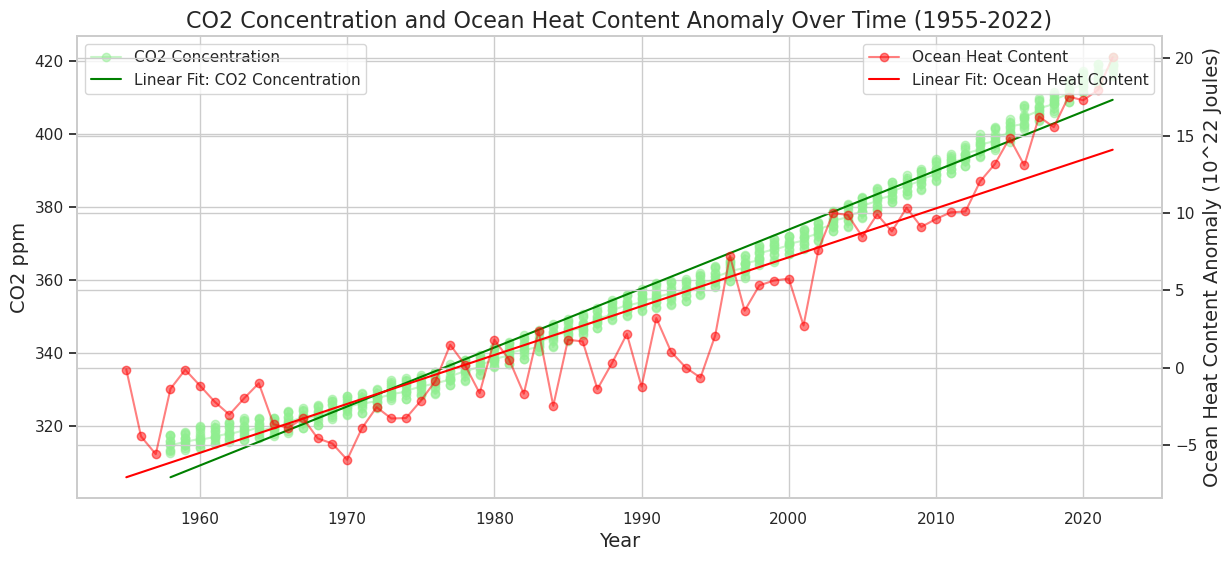

In [10]:
# Load CO2 data from a CSV file into a DataFrame named 'co2'
co2 = pd.read_csv("data/co2_mm_mlo.csv")

# Convert the 'decimal date' in CO2 data to an integer year for easier merging and comparison
co2['Year'] = co2['decimal date'].astype(int)

# Filter the CO2 data to include only the years 1955 to 2022
filtered_co2 = co2[(co2['Year'] >= 1955) & (co2['Year'] <= 2022)]
x_data_co2 = filtered_co2['Year']  # Extract the 'Year' column for X-axis data
y_data_co2 = filtered_co2['average']  # Extract the 'average' CO2 concentration for Y-axis data

# Perform linear regression on the filtered CO2 data
slope_co2, intercept_co2, _, _, _ = stats.linregress(x_data_co2, y_data_co2)
line_co2 = slope_co2 * x_data_co2 + intercept_co2  # Calculate the regression line

# Filter the Ocean Heat data to include only the years 1955 to 2022
filtered_ocean_temp = ocean_temp[(ocean_temp['Year'] >= 1955) & (ocean_temp['Year'] <= 2022)]
x_data_ocean = filtered_ocean_temp['Year']  # Extract the 'Year' column for X-axis data
y_data_ocean = filtered_ocean_temp['heat content anomaly (10^22  Joules)']  # Extract the 'heat content anomaly' for Y-axis data

# Perform linear regression on the filtered Ocean Heat data
slope_ocean, intercept_ocean, _, _, _ = stats.linregress(x_data_ocean, y_data_ocean)
line_ocean = slope_ocean * x_data_ocean + intercept_ocean  # Calculate the regression line

# Create the figure and axis for the CO2 data plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the CO2 data with a scatter plot and a linear fit line
ax1.plot(x_data_co2, y_data_co2, color='lightgreen', alpha=0.5, label='CO2 Concentration', marker='o')  # Scatter plot for CO2
ax1.plot(x_data_co2, line_co2, color='green', label='Linear Fit: CO2 Concentration')  # Regression line for CO2
ax1.set_xlabel('Year', fontsize=14)  # X-axis label
ax1.set_ylabel('CO2 ppm', fontsize=14)  # Y-axis label for CO2
ax1.legend(loc='upper left')  # Legend for the first plot

# Create a second axis for the Ocean Heat data plot
ax2 = ax1.twinx()

# Plot the Ocean Heat data with a scatter plot and a linear fit line
ax2.plot(x_data_ocean, y_data_ocean, color='red', alpha=0.5, label='Ocean Heat Content', marker='o')  # Scatter plot for Ocean Heat
ax2.plot(x_data_ocean, line_ocean, color='red', label='Linear Fit: Ocean Heat Content')  # Regression line for Ocean Heat
ax2.set_ylabel('Ocean Heat Content Anomaly (10^22 Joules)', fontsize=14)  # Y-axis label for Ocean Heat
ax2.legend(loc='upper right')  # Legend for the second plot

# Set the title of the plot
plt.title('CO2 Concentration and Ocean Heat Content Anomaly Over Time (1955-2022)', fontsize=16)

# Display the combined plot
plt.show()


### Plot analysis:

Both slopes are positive and the have the same sign, which means they have positive correlation. They intercept around year 1972, and after then, CO2 has greater slope than ocean heat anomaly.

## 4. Result

All the factors we hypothesize are positively related to ocean heat anomaly. Among those, sea level and CO2 increase faster than ocean heat anomaly and ocean heat anomaly increases faster than global temperature anomaly. We need to be aware that the ocean is now facing great challenge with stronger anomaly and rising sea level.